In [1]:
#NA DOLE NOTATNIKA SĄ URUCHAMIANE DATASET DO DANYCH Z TABELI NR 3 ORAZ 4!
# Data set generation
import numpy as np
import matplotlib.pyplot as plt
import random
import time

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, Adagrad, Nadam

# Generate 3 dimensional dataset with 10 classes and 250 elements
# def generate_dataset():
#     X = []
#     y = []
#     for i in range(250):
#         x1 = random.uniform(0, 10)
#         x2 = random.uniform(0, 10)
#         x3 = random.uniform(0, 10)
#         X.append([x1, x2, x3])
#         y.append(random.randint(0, 9))
#     return np.array(X), np.array(y)


def generate_dataset():
    X = []
    y = []
    means = [[3, 3, 3], [5, 5, 5], [7, 7, 7], [9, 9, 9], [1, 1, 1], [2, 2, 2], [4, 4, 4], [6, 6, 6], [8, 8, 8], [0, 0, 0]]
    covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
    for i in range(10):
        X_class = np.random.multivariate_normal(means[i], covs[i], 25)
        X.extend(X_class)
        y.extend([i] * 25)
    return np.array(X), np.array(y)





In [2]:
# Plot the dataset
def plot_dataset(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(10):
        X_class = X[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2],
                   label='Class {}'.format(i))
    ax.legend()
    plt.show()
     

In [3]:
# Keras model class
class Classifier:
    def __init__(self, num_layers, neurons_per_layer, activation):
        self.num_layers = num_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation = activation

    def build_model(self, input_shape):
        model = Sequential()
        model.add(Dense(self.neurons_per_layer, activation=self.activation, input_shape=(input_shape,)))
        for i in range(self.num_layers - 1):
            model.add(Dense(self.neurons_per_layer, activation=self.activation))
        model.add(Dense(10, activation='softmax'))
        return model

In [4]:
# Train the model
def train(X, y, model, optimizer, epochs):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X, y, epochs=epochs, verbose=0)
    return history

In [5]:
# Plot the training results
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [6]:
# Plot the classification results
def plot_classification_results(X, y, model):
    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(10):
        X_class = X[y == i]
        y_pred_class = y_pred[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], c=y_pred_class,
                   label='Class {}'.format(i))
    ax.legend()
    plt.show()

In [7]:
# Main function
def experiment(num_layers=3, neurons_per_layer=32, activation='relu', epochs=100, lr=0.001):
    X, y = generate_dataset()
    #plot_dataset(X, y)

    classifier = Classifier(num_layers, neurons_per_layer, activation)
    model = classifier.build_model(input_shape=3)

    optimizer = Adam(lr=lr)
    history = train(X, y, model, optimizer, epochs)
    #plot_history(history)
    
    print("Liczba_warstw: ",num_layers," Liczba_neuronów: ",neurons_per_layer, " Activation: ", activation, "Liczba trenowań: ", epochs,"LEARNING RATE: ", lr)
    print("Dokładność: ",max(history.history['accuracy']))
    plot_classification_results(X, y, model)

In [8]:
lr = 0.001
epochs = 100
ilosc_neuronow = 1
warstwy = 1 
aktywacje = ['ReLU','tanh','linear','sigmoid']

In [ ]:
#experiment(4, 6)
#Zadanie 2
neurony = [2,4,8,16,32,64]
warstwy = [2,3,4,5]


for x in warstwy:
    for z in neurony:
        experiment(x, z)
        
        

In [ ]:
#Zadanie 3
experiment(4, 4)

In [ ]:
#Zadanie 4

trenowanie = [100, 200, 300,400]
for x in trenowanie:
    experiment(4, 4, epochs=x)

In [ ]:
#Podział_Gaussa

In [ ]:
ilosc_neuronow = 1
warstwy = 1 
aktywacje = ['ReLU','tanh','linear','sigmoid']

Architektura - 1


C:\Users\Pawel\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Liczba_warstw:  2  Liczba_neuronów:  2  Activation:  ReLU Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.3075000047683716
313/313 [==============================] - 1s 3ms/step


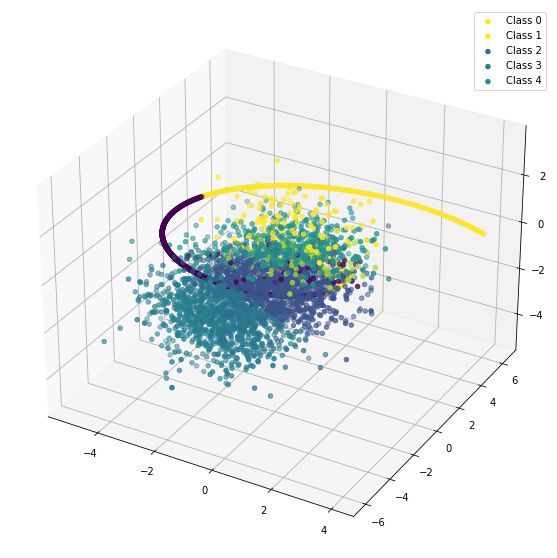

In [10]:
print("Architektura - 1")
experiment(warstwy + 1, ilosc_neuronow + 1,activation=aktywacje[0])

Architektura - 2
Liczba_warstw:  4  Liczba_neuronów:  3  Activation:  tanh Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.28790000081062317
313/313 [==============================] - 2s 4ms/step


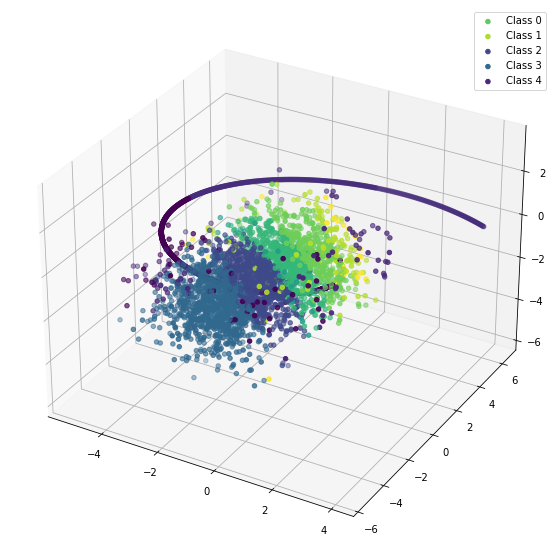

In [11]:
print("Architektura - 2")
experiment(warstwy + 3, ilosc_neuronow + 2,activation=aktywacje[1])

Architektura - 3
Liczba_warstw:  6  Liczba_neuronów:  4  Activation:  linear Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.23180000483989716
313/313 [==============================] - 1s 4ms/step


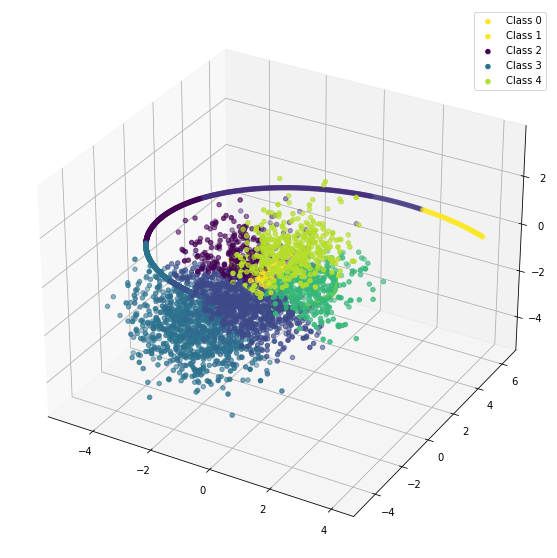

In [12]:
print("Architektura - 3")
experiment(warstwy + 5,ilosc_neuronow + 3,activation=aktywacje[2])

Architektura - 4
Liczba_warstw:  8  Liczba_neuronów:  5  Activation:  sigmoid Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.24660000205039978
313/313 [==============================] - 2s 4ms/step


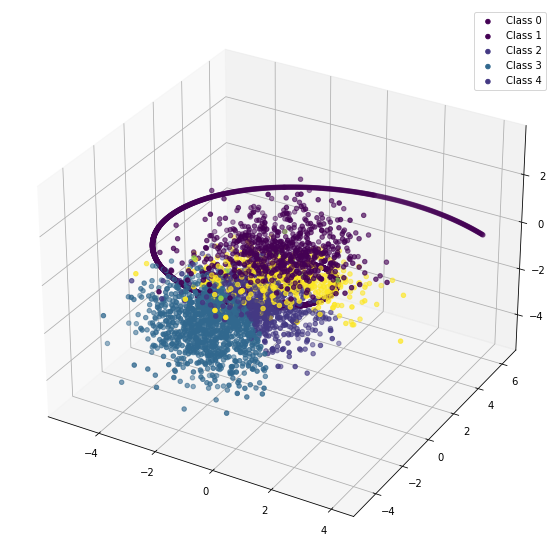

In [13]:
print("Architektura - 4")
experiment(warstwy + 7,ilosc_neuronow + 4,activation=aktywacje[3])

Architektura - 5
Liczba_warstw:  5  Liczba_neuronów:  6  Activation:  ReLU Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.3896999955177307
313/313 [==============================] - 1s 3ms/step


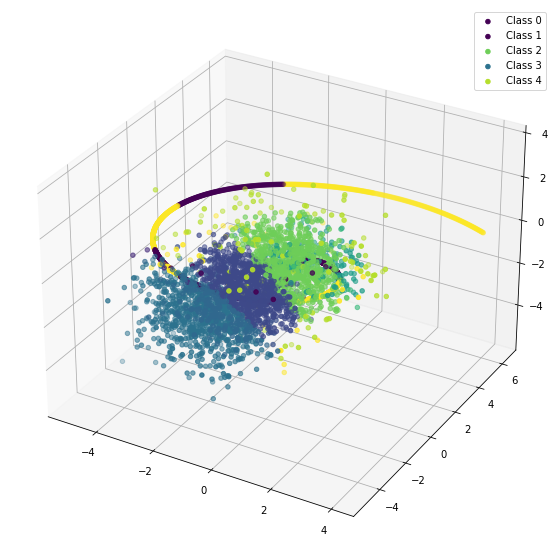

In [14]:
print("Architektura - 5")
experiment(warstwy + 4, ilosc_neuronow + 5,activation=aktywacje[0])

Architektura - 6
Liczba_warstw:  7  Liczba_neuronów:  7  Activation:  tanh Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.38440001010894775
313/313 [==============================] - 1s 2ms/step


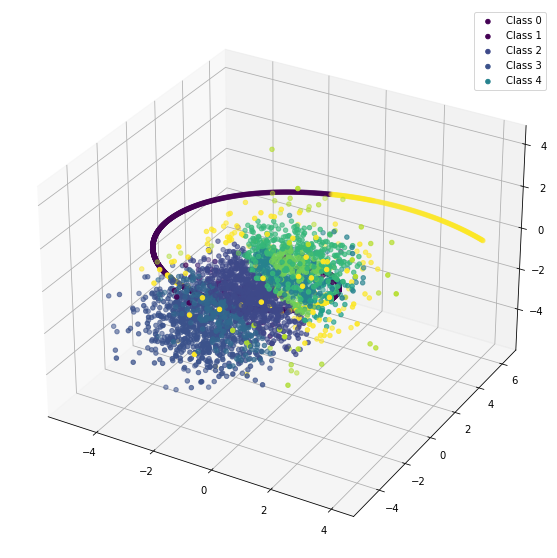

In [15]:
print("Architektura - 6")
experiment(warstwy + 6, ilosc_neuronow + 6,activation=aktywacje[1])

Architektura - 7
Liczba_warstw:  4  Liczba_neuronów:  8  Activation:  linear Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.22540000081062317
313/313 [==============================] - 1s 3ms/step


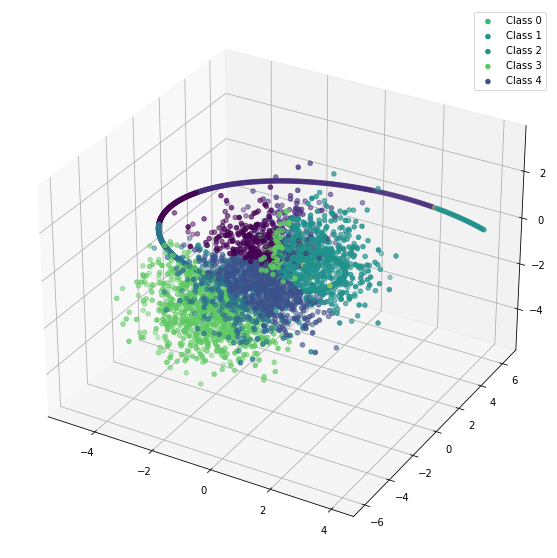

In [16]:
print("Architektura - 7")
experiment(warstwy + 3, ilosc_neuronow + 7,activation=aktywacje[2])

Architektura - 8
Liczba_warstw:  3  Liczba_neuronów:  9  Activation:  sigmoid Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.3725999891757965
313/313 [==============================] - 1s 4ms/step


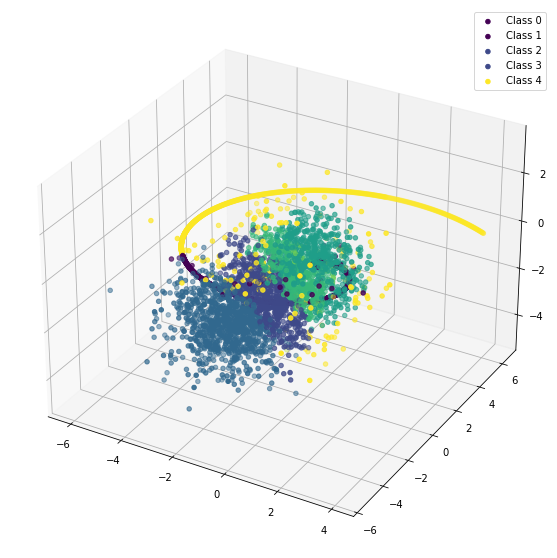

In [17]:
print("Architektura - 8")
experiment(warstwy + 2, ilosc_neuronow + 8,activation=aktywacje[3])

Architektura - 9
Liczba_warstw:  2  Liczba_neuronów:  10  Activation:  ReLU Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.38100001215934753
313/313 [==============================] - 1s 3ms/step


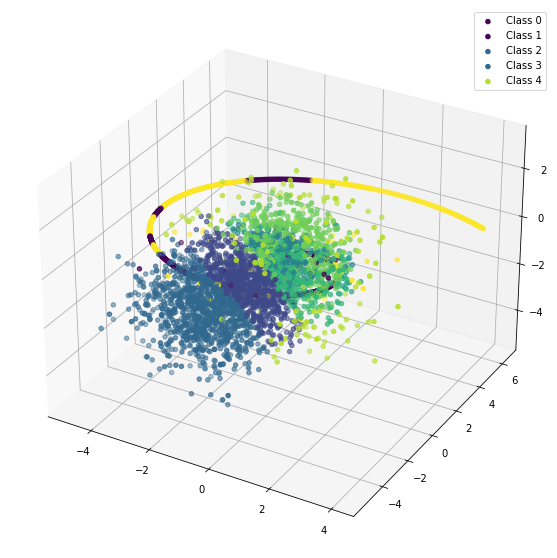

In [18]:
print("Architektura - 9")
experiment(warstwy + 1, ilosc_neuronow + 9,activation=aktywacje[0])

Architektura - 10
Liczba_warstw:  10  Liczba_neuronów:  11  Activation:  tanh Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.38359999656677246
313/313 [==============================] - 1s 3ms/step


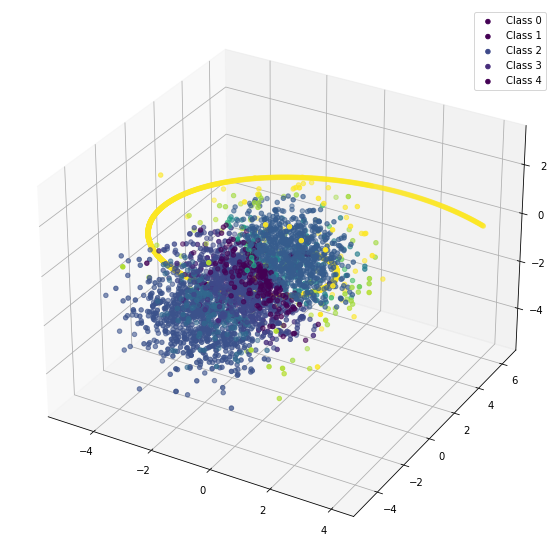

In [19]:
print("Architektura - 10")
experiment(warstwy + 9, ilosc_neuronow + 10,activation=aktywacje[1])

In [ ]:
#Zadanie 2 

Liczba_warstw:  7  Liczba_neuronów:  2  Activation:  linear Liczba trenowań:  100 LEARNING RATE:  0.001
Dokładność:  0.20409999787807465
313/313 [==============================] - 1s 3ms/step


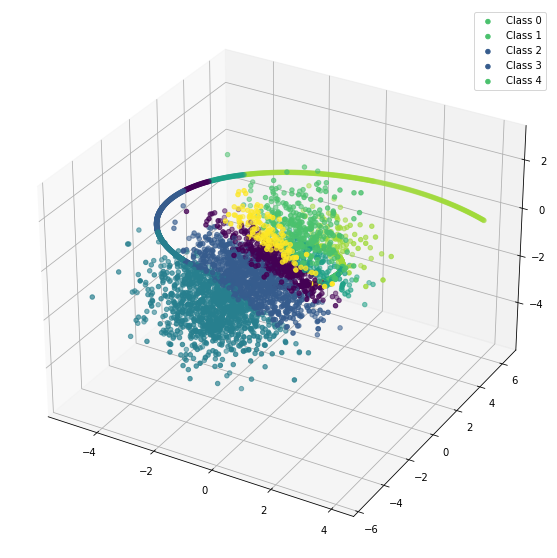

Czas wykonania funkcji: 117.9389660358429


In [20]:
start_time = time.time()

experiment(warstwy + 6, ilosc_neuronow + 1,activation=aktywacje[2], epochs = epochs, lr=lr)

end_time = time.time()
print("Czas wykonania funkcji:", end_time - start_time)

Liczba_warstw:  7  Liczba_neuronów:  2  Activation:  linear Liczba trenowań:  200 LEARNING RATE:  0.01
Dokładność:  0.22139999270439148
313/313 [==============================] - 0s 1ms/step


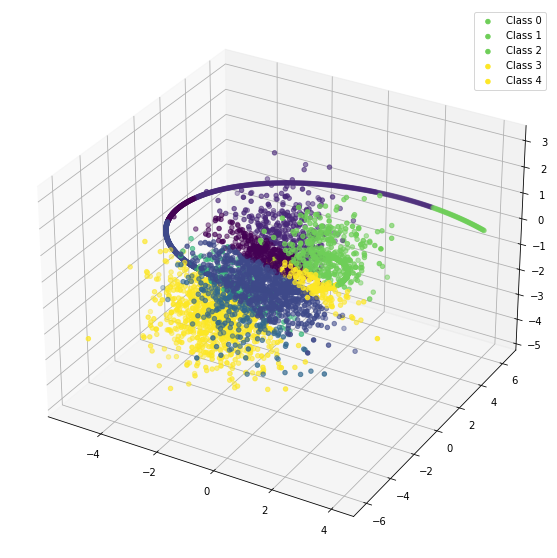

Czas wykonania funkcji: 17105.206724882126


In [21]:
start_time = time.time()

experiment(warstwy + 6, ilosc_neuronow + 1,activation=aktywacje[2], epochs = epochs + 100, lr=lr*10)

end_time = time.time()
print("Czas wykonania funkcji:", end_time - start_time)

Liczba_warstw:  7  Liczba_neuronów:  2  Activation:  linear Liczba trenowań:  200 LEARNING RATE:  0.015
Dokładność:  0.21580000221729279
313/313 [==============================] - 0s 956us/step


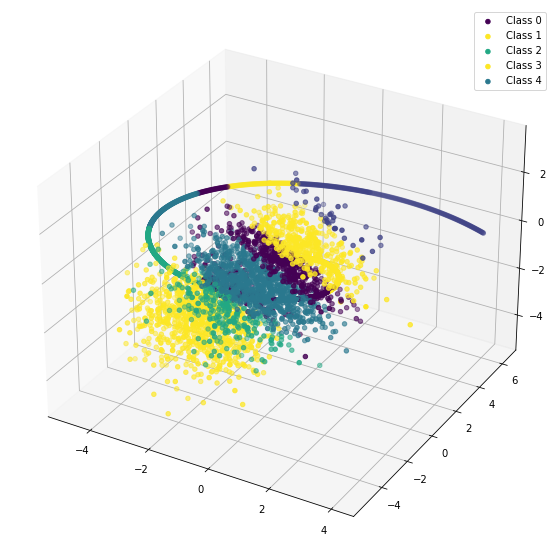

Czas wykonania funkcji: 126.95031547546387


In [22]:
start_time = time.time()

experiment(warstwy + 6, ilosc_neuronow + 1,activation=aktywacje[2], epochs = epochs+100, lr=lr*15)

end_time = time.time()
print("Czas wykonania funkcji:", end_time - start_time)

Liczba_warstw:  7  Liczba_neuronów:  2  Activation:  linear Liczba trenowań:  200 LEARNING RATE:  0.02
Dokładność:  0.22100000083446503
313/313 [==============================] - 0s 955us/step


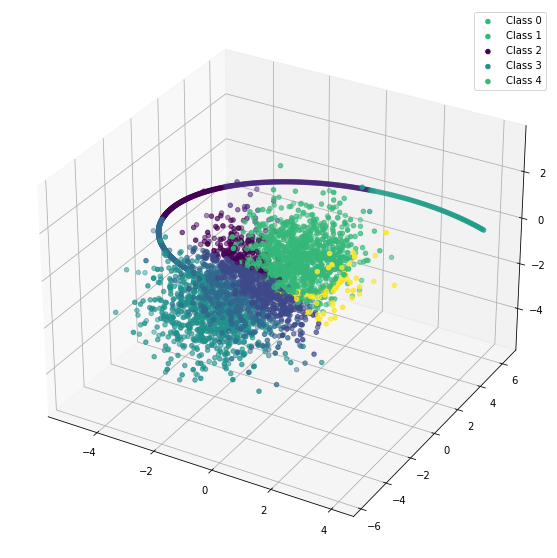

Czas wykonania funkcji: 94.10252928733826


In [23]:
start_time = time.time()

experiment(warstwy + 6, ilosc_neuronow + 1,activation=aktywacje[2], epochs = epochs+100, lr=lr*20)

end_time = time.time()
print("Czas wykonania funkcji:", end_time - start_time)

Liczba_warstw:  7  Liczba_neuronów:  2  Activation:  linear Liczba trenowań:  300 LEARNING RATE:  0.02
Dokładność:  0.21379999816417694
313/313 [==============================] - 0s 999us/step


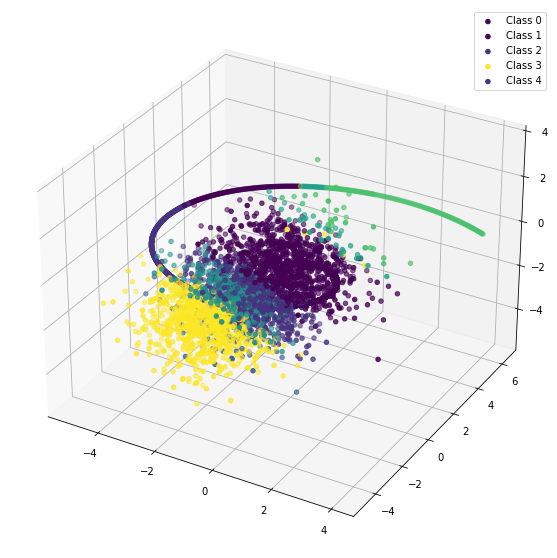

Czas wykonania funkcji: 258.65711188316345


In [24]:
start_time = time.time()

experiment(warstwy + 6, ilosc_neuronow + 1,activation=aktywacje[2], epochs = epochs+200, lr=lr*20)

end_time = time.time()
print("Czas wykonania funkcji:", end_time - start_time)

Liczba_warstw:  7  Liczba_neuronów:  2  Activation:  linear Liczba trenowań:  400 LEARNING RATE:  0.015
Dokładność:  0.21199999749660492
313/313 [==============================] - 1s 1ms/step


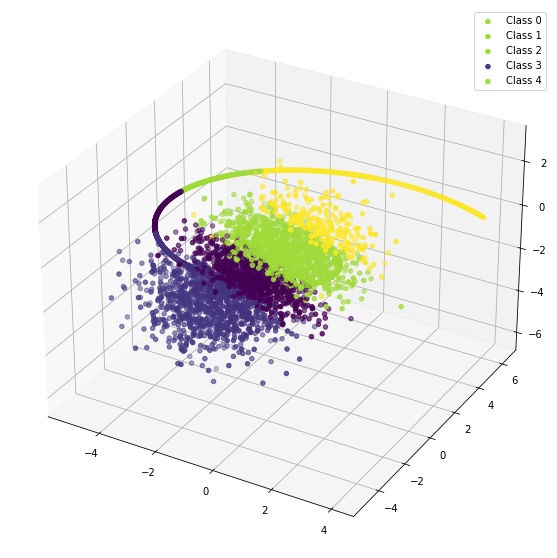

Czas wykonania funkcji: 177.0270676612854


In [25]:
start_time = time.time()

experiment(warstwy + 6, ilosc_neuronow + 1,activation=aktywacje[2], epochs = epochs+300, lr=lr*15)

end_time = time.time()
print("Czas wykonania funkcji:", end_time - start_time)

In [ ]:
#Zbiór geometryczny nr 3
def generate_dataset():
    X = []
    y = []
    for i in range(5):
        t = np.linspace(0, 2 * np.pi, 1000) + i * np.pi / 5
        x = np.sin(t) * t
        y_ = np.cos(t) * t
        X_class = np.column_stack((x, y_))
        if i == 0:
            X = X_class
            y = np.array([i] * 1000)
        else:
            X = np.concatenate((X, X_class), axis=0)
            y = np.concatenate((y, np.array([i] * 1000)), axis=0)
    return X, y

def plot_dataset(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], label='Class {}'.format(i))
    ax.legend()
    plt.show()

def plot_classification_results(X, y, model):
    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        y_pred_class = y_pred[y == i]
        X_class_3d = np.column_stack((X_class, np.zeros(len(X_class)))) # add a third dimension
        ax.scatter(X_class_3d[:, 0], X_class_3d[:, 1], X_class_3d[:, 2], c=y_pred_class,
                   label='Class {}'.format(i))
    ax.legend()
    plt.show()

# Main function

    
    


In [9]:
#Zbiór geometryczny nr 4
def generate_dataset():
    X = []
    y = []
    means = [[1, 1, 1], [2, 2, 2], [-1, -1, -1], [-2, -2, -2], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
    covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
    for i in range(10):
        if i < 2:
            t = np.linspace(0, 2 * np.pi, 1000) + i * np.pi / 5
            x = np.sin(t) * t
            y_ = np.cos(t) * t
            z = np.zeros(1000)  # Add a third dimension filled with zeros
            X_class = np.column_stack((x, y_, z))
        elif i < 4:
            X_class = np.random.multivariate_normal(means[i], covs[i], 1000)
        elif i < 6:
            x, y_, z = np.random.randn(3, 1000)
            X_class = np.column_stack((x, y_, z))
        elif i < 8:
            X_class = np.random.randn(1000, 3)
        else:
            x, y_, z = np.random.randn(3, 1000) * 2
            X_class = np.column_stack((x, y_, z))
        if i == 0:
            X = X_class
            y = np.array([i] * 1000)
        else:
            X = np.concatenate((X, X_class), axis=0)
            y = np.concatenate((y, np.array([i] * 1000)), axis=0)
    return X, y
	
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_dataset(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(10):
        X_class = X[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], label='Class {}'.format(i))
    ax.legend()
    plt.show()

def plot_classification_results(X, y, model):
    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        y_pred_class = y_pred[y == i]
        X_class_3d = np.column_stack((X_class, np.zeros(len(X_class)))) # add a third dimension
        ax.scatter(X_class_3d[:, 0], X_class_3d[:, 1], X_class_3d[:, 2], c=y_pred_class,
                   label='Class {}'.format(i))
    ax.legend()
    plt.show()
	
# Main function

